In [363]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from textblob import TextBlob

In [366]:
df = pd.read_csv('customer_shopping_data.csv')
df.head(10)

invoice_no customer_id  gender  age   category  quantity    price  \
0    I138884     C241288  Female   28   Clothing         5  1500.40   
1    I317333     C111565    Male   21      Shoes         3  1800.51   
2    I127801     C266599    Male   20   Clothing         1   300.08   
3    I173702     C988172  Female   66      Shoes         5  3000.85   
4    I337046     C189076  Female   53      Books         4    60.60   
5    I227836     C657758  Female   28   Clothing         5  1500.40   
6    I121056     C151197  Female   49  Cosmetics         1    40.66   
7    I293112     C176086  Female   32   Clothing         2   600.16   
8    I293455     C159642    Male   69   Clothing         3   900.24   
9    I326945     C283361  Female   60   Clothing         2   600.16   

  payment_method invoice_date     shopping_mall  
0    Credit Card     5/8/2022            Kanyon  
1     Debit Card   12/12/2021    Forum Istanbul  
2           Cash    9/11/2021         Metrocity  
3    Credit Card   16/05/2021      Metropol AVM  
4           Cash   24/10/2021            Kanyon  
5    Credit Card   24/05/2022    Forum Istanbul  
6           Cash   13/03/2022      Istinye Park  
7    Credit Card   13/01/2021  Mall of Istanbul  
8    Credit Card    4/11/2021         Metrocity  
9    Credit Card   22/08/2021            Kanyon

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [367]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

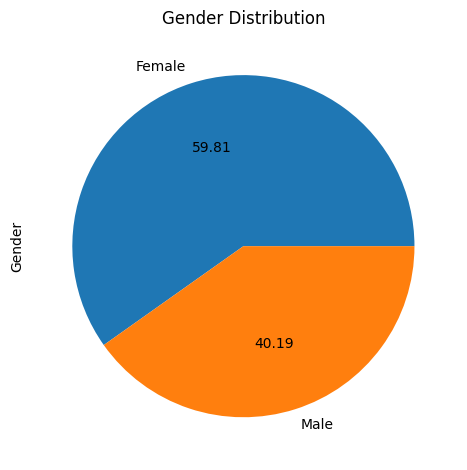

In [351]:
gender_distribution = df['gender'].value_counts()
gender_distribution

gender_distribution.plot(kind='pie',autopct='%1.2f')

plt.title('Gender Distribution')
plt.ylabel('Gender')

plt.tight_layout()
plt.show()

In [352]:
df.groupby(['gender','category']).sum(['price']).reset_index()[['gender','category','price']].sort_values(by=['gender','price'],ascending=False)

gender         category        price
9     Male         Clothing  12459021.52
12    Male            Shoes   7388692.87
14    Male       Technology   6346200.00
10    Male        Cosmetics    740174.64
15    Male             Toys    428610.56
8     Male            Books     94020.90
11    Male  Food & Beverage     93695.45
13    Male         Souvenir     69148.35
1   Female         Clothing  18616663.12
4   Female            Shoes  10746644.02
6   Female       Technology   9425850.00
2   Female        Cosmetics   1108432.26
7   Female             Toys    658094.08
3   Female  Food & Beverage    137873.26
0   Female            Books    132956.40
5   Female         Souvenir    105288.48

In [353]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')
df['invoice_month'] = df['invoice_date'].dt.month
df['invoice_year'] = df['invoice_date'].dt.year
df.groupby(['invoice_year']).sum(['price']).reset_index()[['invoice_year','price']]

invoice_year        price
0        2021.0  12295598.61
1        2022.0  12465188.81
2        2023.0   2805040.42

In [354]:
# https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
df.groupby(pd.Grouper(key='invoice_date',freq='ME')).sum().reset_index()[['invoice_date','price']].sort_values(by=['invoice_date'])

invoice_date       price
0    2021-01-31   961433.99
1    2021-02-28  1008348.21
2    2021-03-31  1099307.80
3    2021-04-30  1082387.50
4    2021-05-31  1040528.62
5    2021-06-30  1042822.81
6    2021-07-31  1020653.35
7    2021-08-31  1013145.62
8    2021-09-30   980300.03
9    2021-10-31  1007095.18
10   2021-11-30  1001197.52
11   2021-12-31  1038377.98
12   2022-01-31  1038495.41
13   2022-02-28  1052237.68
14   2022-03-31  1014834.27
15   2022-04-30  1008777.44
16   2022-05-31  1063027.59
17   2022-06-30  1046040.18
18   2022-07-31  1008366.36
19   2022-08-31   993966.00
20   2022-09-30  1041166.52
21   2022-10-31  1038677.29
22   2022-11-30  1083439.93
23   2022-12-31  1076160.14
24   2023-01-31   252709.48
25   2023-02-28   262786.89
26   2023-03-31   246276.50
27   2023-04-30   276995.69
28   2023-05-31   257420.54
29   2023-06-30   301680.27
30   2023-07-31   256520.43
31   2023-08-31   252117.95
32   2023-09-30   194996.06
33   2023-10-31   207778.80
34   2023-11-30   142045.14
35   2023-12-31   153712.67

Text(0.5, 1.0, 'Average price by gender')

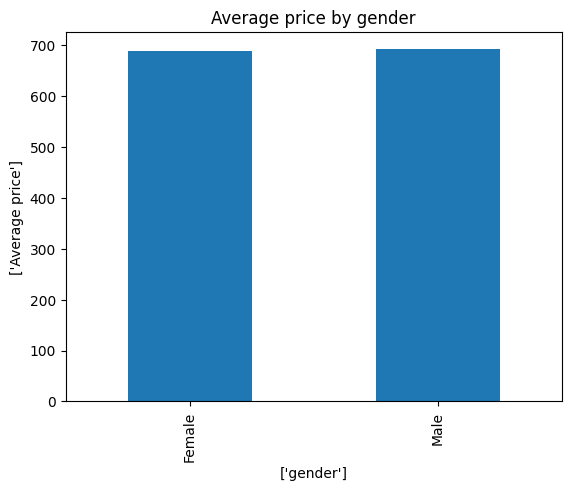

In [355]:
df2 = df.groupby(['gender'])['price'].mean()#.reset_index()[['gender','price']]
df2.plot(kind='bar')
plt.xlabel(['gender'])
plt.ylabel(['Average price'])
plt.title('Average price by gender')

<Axes: xlabel='invoice_date'>

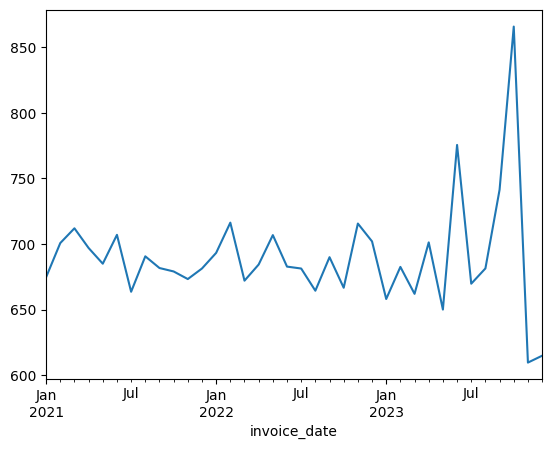

In [356]:
Monthly_group = df.groupby(pd.Grouper(key='invoice_date',freq='ME'))['price'].mean()
#Monthly_group
Monthly_group.plot(kind='line')

Text(0, 0.5, 'Total amount (In Million)')

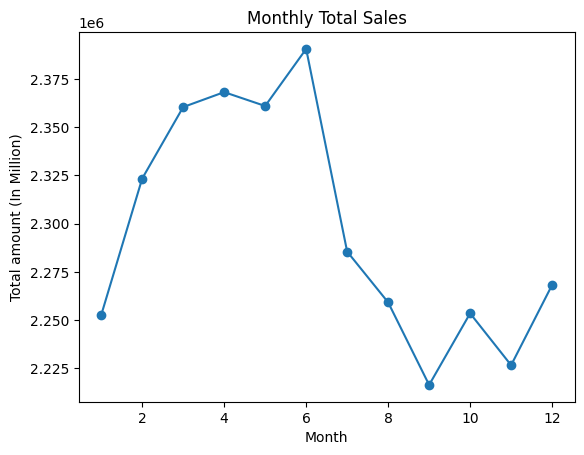

In [163]:
Monthly = df.groupby('invoice_month')['price'].sum()
Monthly.plot(kind='line',marker='o')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total amount (In Million)')

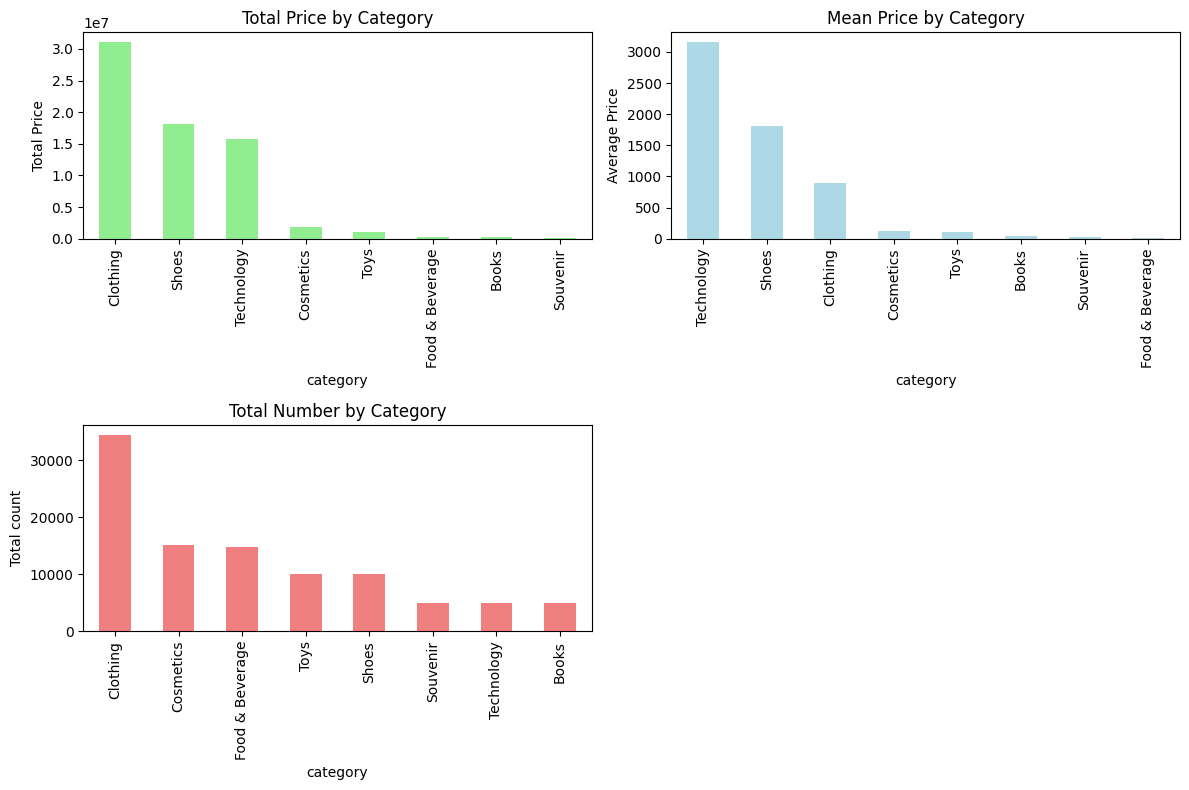

In [357]:
Genre_total = df.groupby(['category'])['price'].sum().sort_values(ascending=False)
Genre_average = df.groupby(['category'])['price'].mean().sort_values(ascending=False)
Genre_count = df.groupby(['category'])['category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
Genre_total.plot(kind='bar',color='lightgreen')
plt.ylabel('Total Price')
plt.title('Total Price by Category')

plt.subplot(2,2,2)
Genre_average.plot(kind='bar',color='lightblue')
plt.ylabel('Average Price')
plt.title('Mean Price by Category')

plt.subplot(2,2,3)
Genre_count.plot(kind='bar',color='lightcoral')
plt.ylabel('Total count')
plt.title('Total Number by Category')

plt.tight_layout()
plt.show()


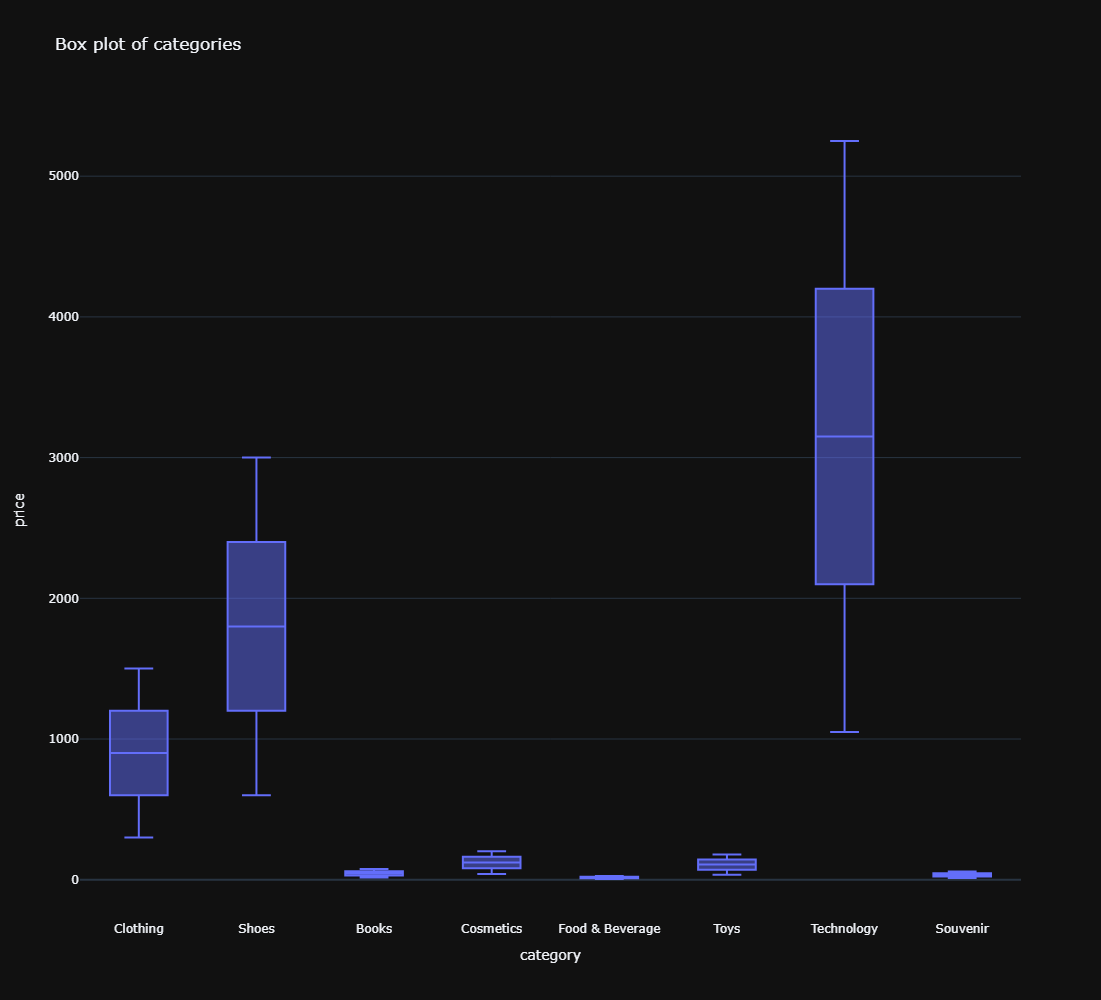

In [358]:
box_category = px.box(df, x='category', y='price', title='Box plot of categories',template='plotly_dark',width=1200, height=1000 )
box_category.show()

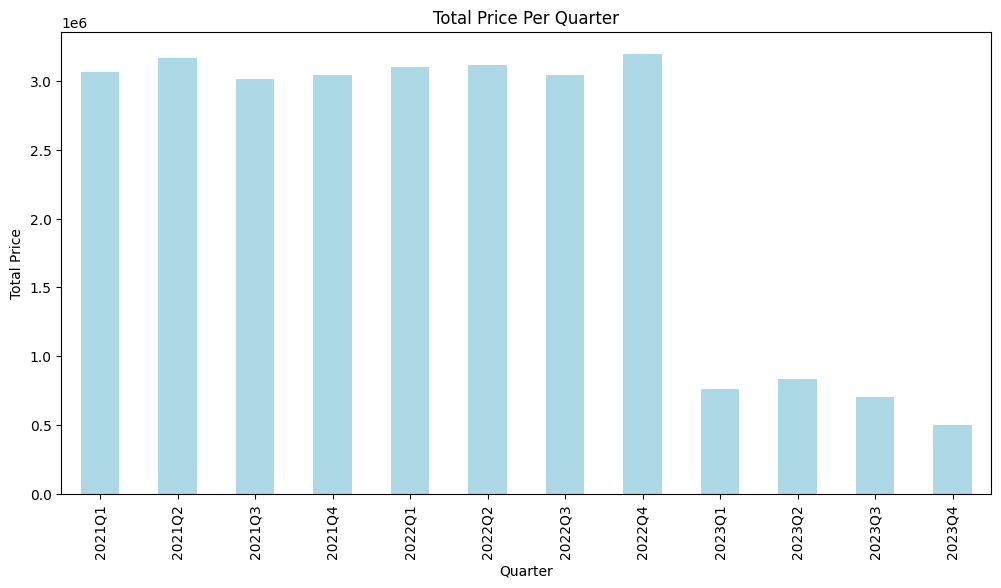

In [362]:
df['invoice_quarter'] = df['invoice_date'].dt.to_period('Q')
quarter = df.groupby(['invoice_quarter'])['price'].sum()

plt.figure(figsize=(12,6))

quarter.plot(kind='bar',color='lightblue')
plt.title('Total Price Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Price')
plt.show()

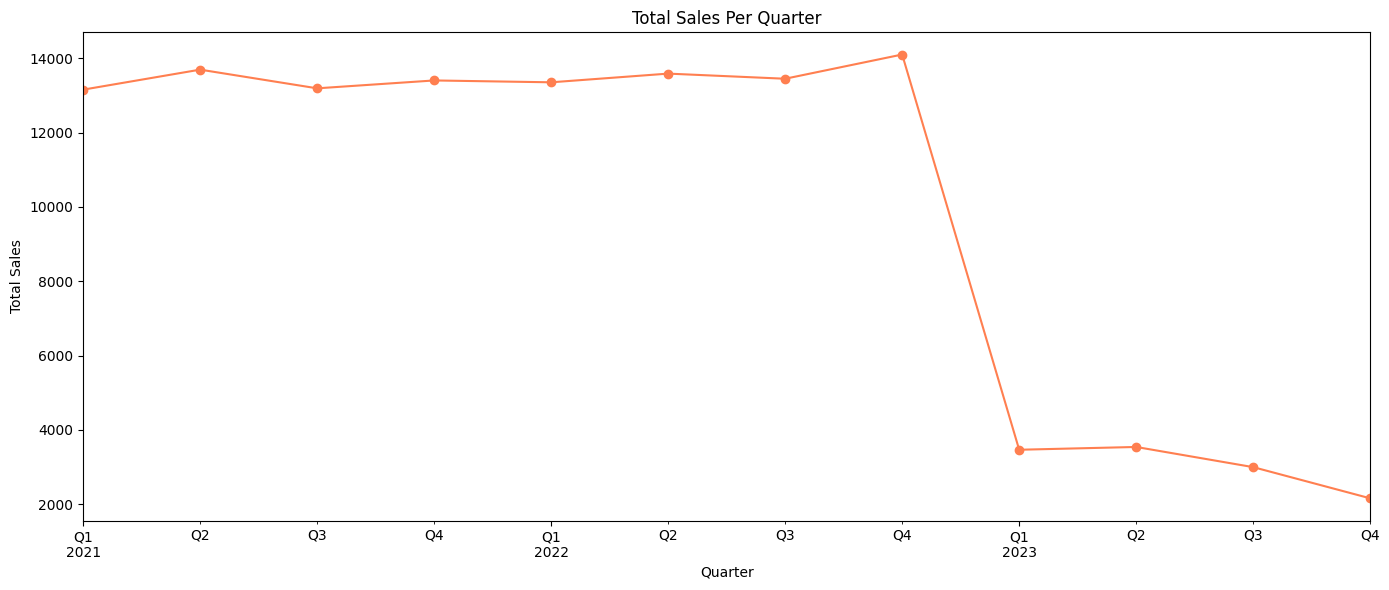

In [190]:
quarter_sales = df.groupby(['invoice_quarter'])['quantity'].sum()
#quarter_sales
plt.figure(figsize=(14,6))

quarter_sales.plot(kind='line',color='coral',marker='o')
plt.title('Total Sales Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')

#plt.grid()
plt.tight_layout()
plt.show()


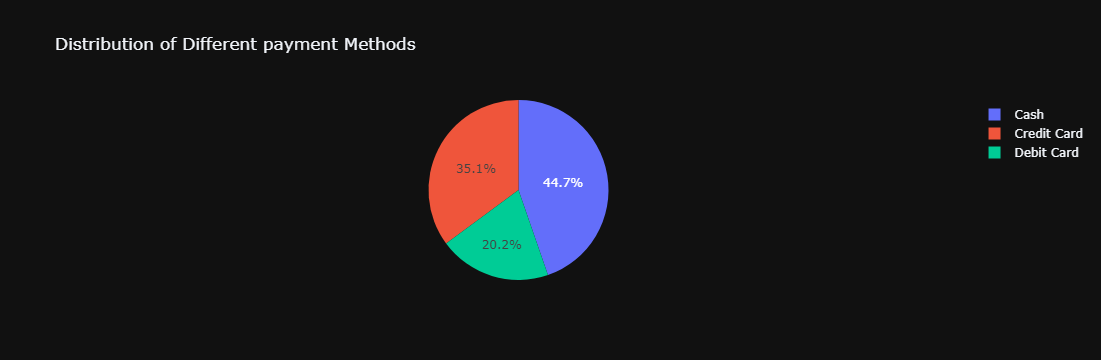

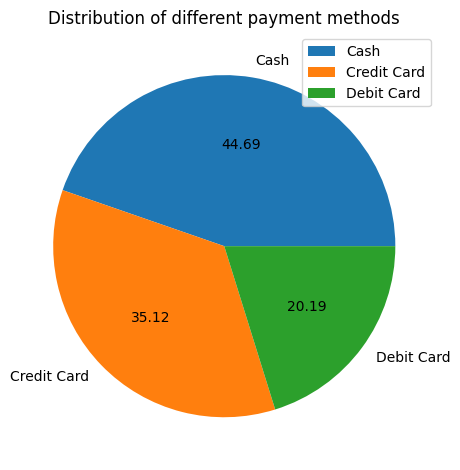

In [329]:
payment_methods = df['payment_method'].value_counts()

# Matplotlib
payment_methods.plot(kind='pie', autopct='%1.2f')
plt.title('Distribution of different payment methods')
plt.ylabel('')
plt.legend(loc='upper right')
plt.tight_layout()

# plotly
fig = px.pie(values=payment_method,names= payment_method.index,title = 'Distribution of Different payment Methods',template='plotly_dark')
fig.show()

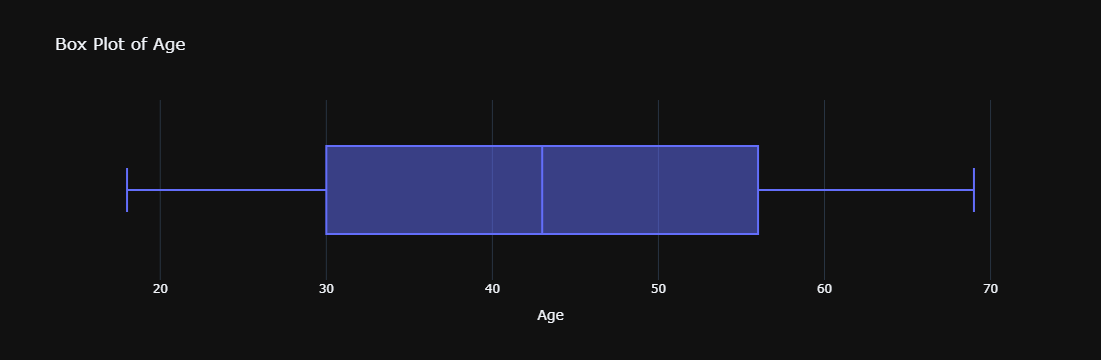

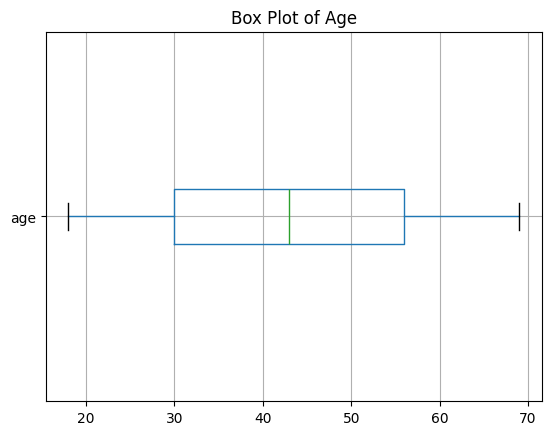

In [330]:
customer_age_below_30 = df[df['age'] < 30]
customer_age_between_30And40 = df[(df['age'] >= 30) & (df['age'] < 40)]
customer_age_between_40And50 = df[(df['age'] >= 40) & (df['age'] < 50)]
customer_age_between_50And60 = df[(df['age'] >= 50) & (df['age'] < 60)]
customer_age_above_60 = df[df['age'] > 60]

# Matplotlib
df[['age']].boxplot(vert=False)
plt.title('Box Plot of Age')

# Plotly
fig = px.box(x = df['age'],labels={'x':'Age'},title='Box Plot of Age',template='plotly_dark')
fig.show()

Text(0, 0.5, 'Total Number Count')

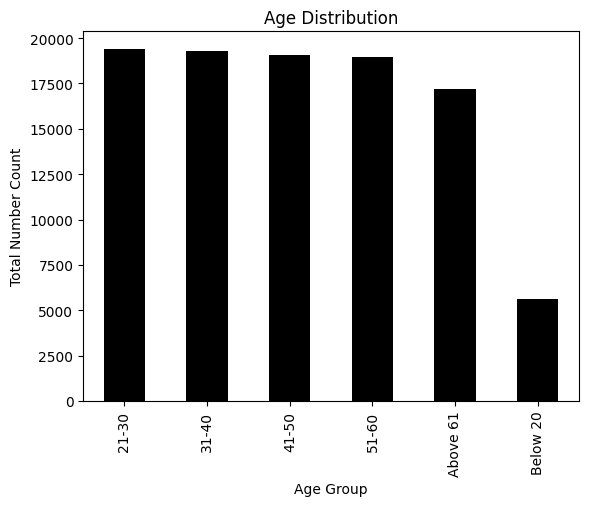

In [328]:
def age_group(x):
    if x <= 20 :
        x= 'Below 20'
    elif x >20 and x <=30:
        x= '21-30'
    elif x >30 and x <=40:
        x= '31-40'
    elif x >40 and x <=50:
        x= '41-50'
    elif x >50 and x <=60:
        x= '51-60'
    else:
        x= 'Above 61'
    return x
#df['age_group']=df['age'].apply(age_group)
df['age_group'].value_counts().plot(kind='bar',color='black')

plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Total Number Count')